

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


# **Sprint 6 - Projeto**

## Etapa 1 - Carregando os dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Carregando o DataFrame
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
# Análise inicial dos dados
games_df.info()
games_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15269,Yamasa Digi Portable: Matsuri no Tatsujin - Wi...,PSP,2006.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6936,Broken Sword: Shadow of the Templars - The Dir...,Wii,2009.0,Adventure,0.11,0.10,0.00,0.02,74.0,8.1,T
5778,SimAnimals,Wii,2009.0,Simulation,0.14,0.13,0.00,0.03,58.0,2.1,E
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
9257,Pet Pals: Animal Doctor,Wii,2008.0,Simulation,0.13,0.00,0.00,0.01,NaN,tbd,E10+


#### Análise da etapa 1

Temos aqui um DataFrame com dados sobre jogos. Ele possui 11 colunas e de cara pude ver que há diversas colunas com valores ausentes. Também há colunas com erro de tipo. Além disso, o nome das colunas não segue o padrão snake_case.

## Etapa 2 - Preparando os dados

#### 2.1 - Corrigindo os nomes das colunas

In [4]:
# Renomeando colunas
new_columns = []
for old_column in games_df.columns:
    new_column = old_column.lower()
    new_columns.append(new_column)

games_df.columns = new_columns

In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 2.2 - Convertendo os tipos de dados

As colunas `'year_of_release'` e `'user_score'` estão com os tipos de dados incorretos e devem ser corrigidas para int e float, respectivamente.

##### 2.2.1 - Coluna `'year_of_release'`

Na coluna `'year_of_release'` entrei em um dilema: o tipo de dados estava em float, e como os dados dessa coluna são anos, deveriam estar em int. Acontece que haviam valores ausentes, e e não  conseguia decidir como lidar com eles. Pensei em mudar para o tipo Int64, do pandas, mas fiquei com receio de não haver compatibilitade com ouras bibliotecas mais à frente. Optei no final por substituir os valores ausentes com 0, e quando for fazer alguma análise estatística mais pra frente do projeto, retirar os valores 0 da análise.

In [7]:
# Preencher com o ano mais comum de outros registros com o mesmo nome
def preencher_com_modo(x):
    if not x.mode().empty:
        return x.fillna(x.mode().iloc[0])
    else:
        return x

# Preencher o que ainda ficou vazio com a mediana da plataforma
def preencher_com_mediana(x):
    mediana = round(x.median())
    return x.fillna(mediana)

In [8]:
# Aqui, optei por remover as linhas com nomes de jogos ausentes, pois 
# imagino que não faça uma diferença significativa na minha análise, e 
# remover essas linhas vai facilitar o funcionamento das minhas funções.
games_df = games_df[games_df['name'].notna()].copy()

In [9]:
games_df['year_of_release'] = games_df.groupby('name')['year_of_release'].transform(preencher_com_modo)

In [10]:
games_df['year_of_release'] = games_df.groupby('platform')['year_of_release'].transform(preencher_com_mediana)

In [11]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

In [12]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


##### 2.2.2 - Coluna `'user_score'`

Na coluna `'user_score'` há valores ausentes NaN e valores 'tbd' (to be determined), que significa que as avaliações do público ainda não estão disponíveis. Optei por substituir esses valores por NaN para facilitar minhas análises futuras. Após esse passo, pude converter a coluna para float.

In [13]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

In [14]:
games_df['user_score'] = games_df['user_score'].astype('float')

In [15]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### 2.3 - Lidando com valores ausentes

Há 4 colunas com valores ausentes. Primeiro vamos às suposições, e então, lidamos com esses valores.

##### 2.3.1 - Coluna `'year_of_release'`:

Os valores ausentes nessa coluna podem ser justificados por dois fatores: ou os jogos ainda não haviam sido lançados quando os dados foram coletados, ou os jogos são antigos e não a data de lançamento não foi identificada.

Já lidei com esses valores no tópico 2.2.1.

##### 2.3.2 - Colunas `'critic_score'` e `'user_score'`:

Suponho que nessas colunas, os valores ausentes se dêem por conta de jogos obscuros ou com poucas vendas que não tiveram avaliações feitas ou então jogos muito novos na época da coleta dos dados, que ainda não haviam avaliações.

Nessas colunas, decidi manter esses valores como NaN, para não influenciar nas minhas análises futuras.

##### 2.3.3 - Coluna `'rating'`:

Nessa coluna, os valores ausentes podem ser justificados pelo fato da classificação ESRB ser feita nos EUA e os jogos não terem sido lançados por lá ou então jogos antigos que foram lançados antes dessa classificação existir.

Vou substituir os valores ausentes nessa coluna por 'Unknown'.

In [19]:
games_df['rating'] = games_df['rating'].fillna('Unknown')

In [20]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


##### 2.3.4 - Colunas `'name'` e `'genre'`:

Nessas colunas, haviam dois valores ausentes. Imagino que possa ser por conta de algum erro de digitação ou dados corrompidos, afinal essas linhas possuem vendas totais em algumas regiões.

Removi as duas linhas com valores ausentes dessas dessas colunas no tópico 2.2.1.

#### 2.4 - Criando a coluna `'total_sales'`

In [21]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

João, acredito que podemos melhorar alguns pontos no tratamento do df:
    
- Para o ano de lamnçamento podemos verificar os jogos que possuem o ano preenchido em outra plataforma e para os que persistirem como ausentes usar um valor calculado dentro da respectiva plataforma e não de forma geral (garanta que esse cálculo resulte em um valor inteiro e não decimal)
    

    
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

- Fiz as alterações com sucesso! Também limpei os tratamentos por conta do 0 na coluna nos gráficos mais à frente. Precisei remover duas linhas de jogos sem nome, mas julguei que eles não vão fazer uma diferença significativa no momento da análise.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



## Etapa 3 - Analisando os dados

#### 3.1 - Jogos lançados por ano

In [65]:
games_per_year = games_df.groupby('year_of_release').size().reset_index(name='game_count')

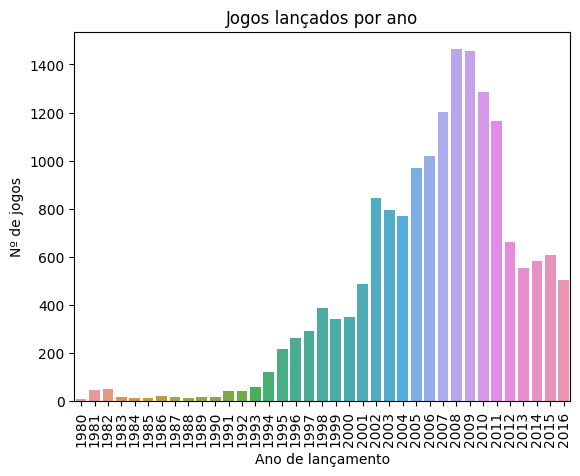

In [66]:
sns.barplot(
    data=games_per_year,
    x='year_of_release',
    y='game_count'
)

plt.title('Jogos lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Nº de jogos')
plt.xticks(rotation=90)
plt.show()

Com base no gráfico acima, podemos concluir que os videogames se popularizaram muito após os anos 2000. Os dados mais significativos (maior número de jogos lançados) estão entre 2002 e 2011.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Lançamentos anuais investigados adequadamente.

</div>


#### 3.2 - Vendas por plataforma

In [24]:
platform_sales = games_df.groupby(['platform'])['total_sales'].sum().reset_index(name='platform_sales').sort_values(by='platform_sales', ascending=False)
platform_sales

,platform,platform_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [67]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

top_platforms_df = games_df[games_df['platform'].isin(top_platforms)]

In [68]:
top_platforms_df_grouped = top_platforms_df.groupby(['year_of_release', 'platform'], as_index=False)['total_sales'].sum()

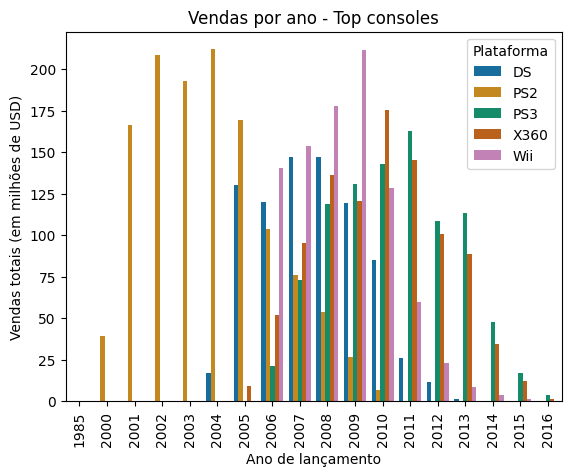

In [69]:
sns.barplot(
    data=top_platforms_df_grouped,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    palette='colorblind'
)

plt.title('Vendas por ano - Top consoles')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas totais (em milhões de USD)')
plt.legend(title='Plataforma', loc='upper right')
plt.xticks(rotation=90)
plt.show()

Me parece o tempo de relevância de cada plataforma varia de 6 a 9 anos. Essa variação depende da popularidade de cada plataforma. Uma nova plataforma precisa de pelo menos 2-3 anos para chegar ao seu pico de relevância, e seu declínio ocorre em um período de 2-3 anos após seu pico.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas por plataformas devidamente exploradas, incluindo ciclo de vida.

</div>


#### 3.3 - Modelo para 2017

Vou trabalhar com os dados de 2006 a 2016 (últimos 10 anos).

In [28]:
games_df_2017 = games_df[(games_df['year_of_release'] >= 2006) & (games_df['year_of_release'] <= 2016)]

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Período escolhido adequadamente.
</div>


##### 3.3.1 - Selecionando as plataformas

In [29]:
top_platform_sales = games_df_2017.groupby('platform')['total_sales'].sum().reset_index()
top_platform_sales

,platform,total_sales
0,3DS,258.98
1,DC,0.06
2,DS,658.69
3,GBA,8.86
4,GC,11.82
5,PC,167.12
6,PS2,267.43
7,PS3,939.46
8,PS4,314.14
9,PSP,243.15


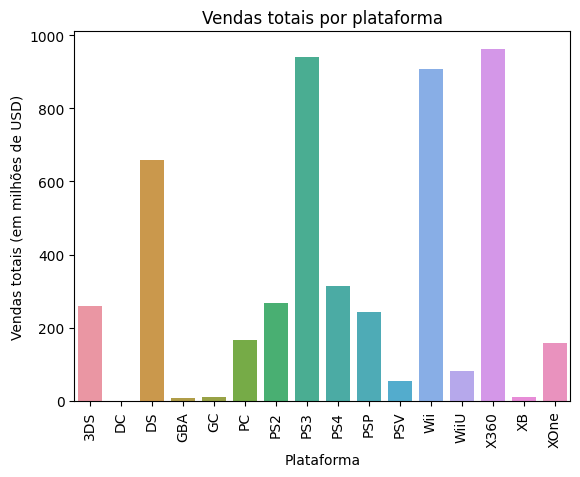

In [30]:
sns.barplot(
    data=top_platform_sales,
    x='platform',
    y='total_sales'
)

plt.title('Vendas totais por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas totais (em milhões de USD)')
plt.xticks(rotation=90)
plt.show()

De acordo com o gráfico acima, as 4 maiores plataformas no período analisado são DS, PS3, Wii e X360. Como temos 3 plataformas de nova geração (PS4, WiiU e XOne), elas também vão ser selecionadas para nossa análise. O PS2 reinou por bastante tempo, mas já está em declínio.

##### 3.3.2 - Boxplot

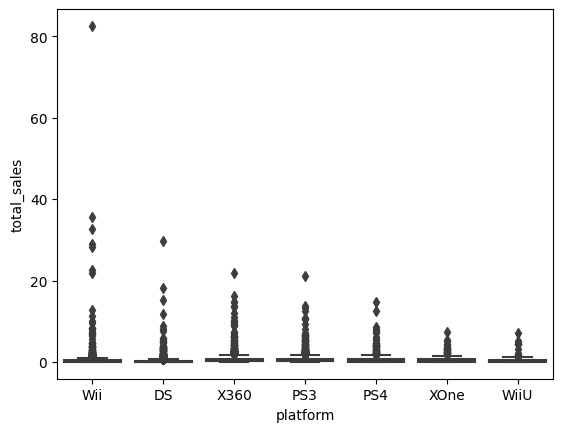

In [31]:
selected_platforms = ['DS', 'PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne']

sns.boxplot(
    data=games_df_2017[games_df_2017['platform'].isin(selected_platforms)],
    x='platform',
    y='total_sales'
)

plt.show()

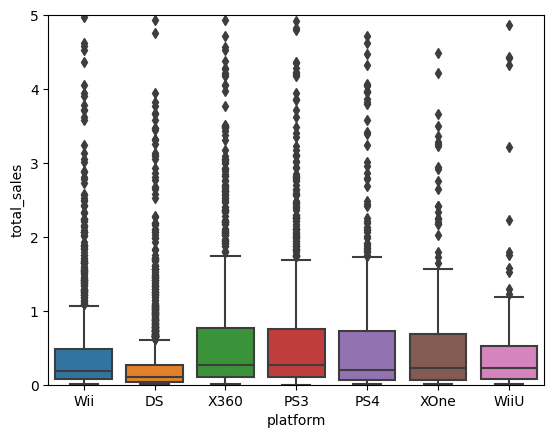

In [32]:
sns.boxplot(
    data=games_df_2017[games_df_2017['platform'].isin(selected_platforms)],
    x='platform',
    y='total_sales'
)

plt.ylim(0, 5)
plt.show()

De acordo com o boxplot acima, as diferenças nas vendas entre plataformas não são muito significativas para a maioria dos jogos, pois a mediana é baixa e parecida entre elas.

A média não é mostrada diretamente no boxplot, mas sabemos que ela provavelmente é maior do que a mediana por causa da assimetria positiva (muitos outliers para cima).

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Boxplots devidamente ilustrados.

</div>


##### 3.3.2 - Correlação entre avaliações e vendas

A plataforma escolhida para essa análise será X360.

In [33]:
# Extraindo apenas os dados necessários (plataforma X360)
x360_data = games_df_2017[games_df_2017['platform'] == 'X360']

In [34]:
# Eliminando valores ausentes
x360_data = x360_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

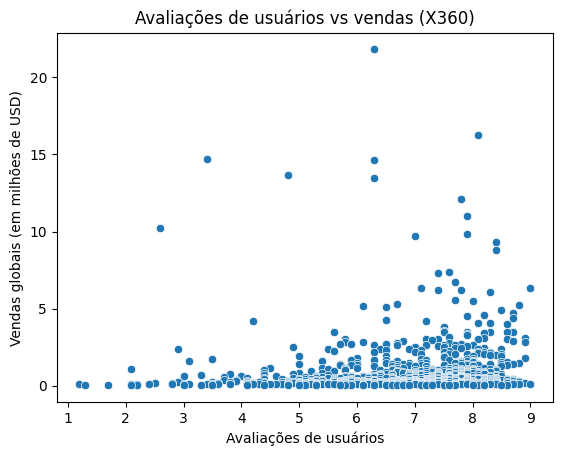

In [35]:
sns.scatterplot(
    data=x360_data,
    x='user_score',
    y='total_sales'
)

plt.title('Avaliações de usuários vs vendas (X360)')
plt.xlabel('Avaliações de usuários')
plt.ylabel('Vendas globais (em milhões de USD)')
plt.show()

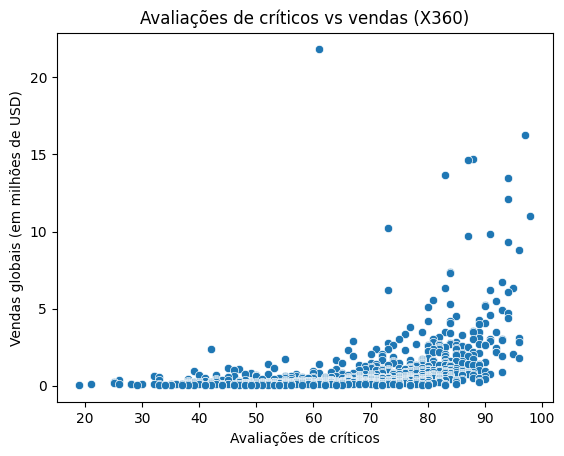

In [36]:
sns.scatterplot(
    data=x360_data,
    x='critic_score',
    y='total_sales'
)

plt.title('Avaliações de críticos vs vendas (X360)')
plt.xlabel('Avaliações de críticos')
plt.ylabel('Vendas globais (em milhões de USD)')
plt.show()

In [37]:
# Calculando a correlação
corr_user = x360_data['user_score'].corr(x360_data['total_sales'])
corr_critic = x360_data['critic_score'].corr(x360_data['total_sales'])

print(f'Correlação entre avaliações de usuários e vendas: {corr_user:.2f}')
print(f'Correlação entre avaliações de críticos e vendas: {corr_critic:.2f}')

Correlação entre avaliações de usuários e vendas: 0.11
Correlação entre avaliações de críticos e vendas: 0.39


A correlação entre as avaliações de usuários e as vendas é de 0.11, o que indica uma correlação fraca. Isso sugere que as avaliações feitas pelos usuários têm pouca influência nas vendas de jogos da plataforma X360.

Já a correlação entre as avaliações de críticos e as vendas é de 0.39, o que indica uma correlação moderada. Isso significa que as avaliações dos críticos têm um impacto mais relevante no desempenho de vendas — embora ainda não seja um fator determinante isolado.

Em resumo, para a plataforma X360, as avaliações dos críticos parecem influenciar mais os consumidores na decisão de compra do que as avaliações feitas pelos usuários.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfil de correlação entre avaliações e vendas conduzido.

</div>



##### 3.3.4 - Comparação da venda de jogos em diferentes plataformas

In [38]:
# Contar quantas plataformas cada jogo apareceu
multi_platform_titles = games_df_2017.groupby('name')['platform'].nunique()

In [39]:
# Filtrar os jogos com 2 ou mais plataformas
multi_platform_titles = multi_platform_titles[multi_platform_titles >= 2].index

In [40]:
# Filtrar o dataframe original para incluir apenas esses jogos
multi_platform_df = games_df_2017[games_df_2017['name'].isin(multi_platform_titles)]

In [41]:
# Agrupar por pelos 5 jogos mais vendidos e somar vendas
top_games = (multi_platform_df.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index)

In [42]:
# Filtrar os dados desses 5 jogos
top_games_df = multi_platform_df[multi_platform_df['name'].isin(top_games)]

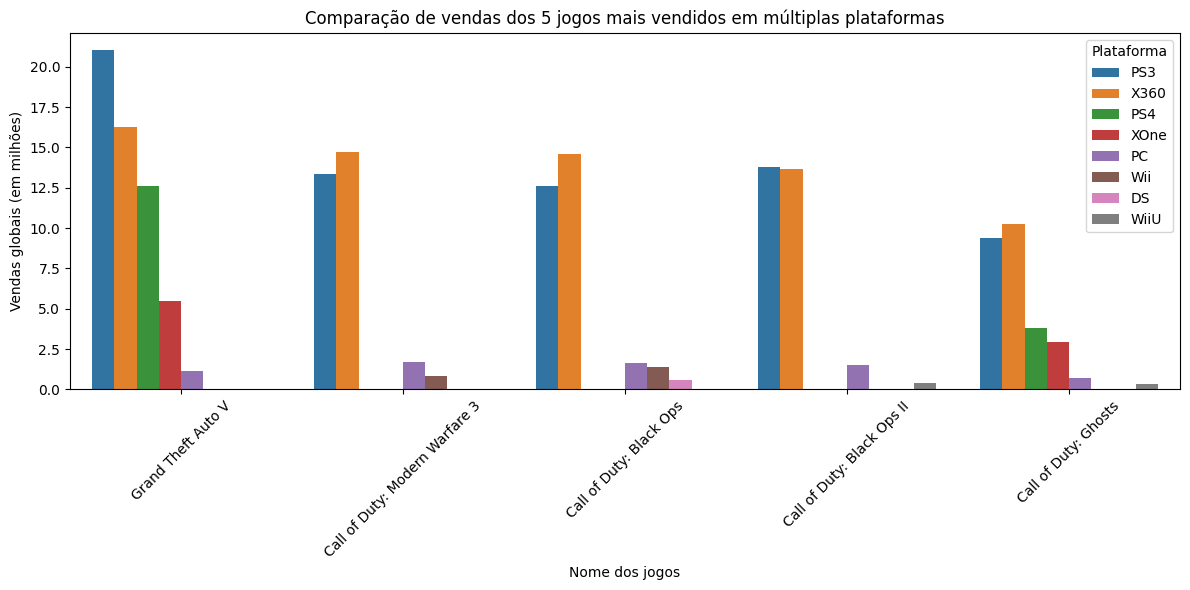

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_games_df,
    x='name',
    y='total_sales',
    hue='platform'
)

plt.title('Comparação de vendas dos 5 jogos mais vendidos em múltiplas plataformas')
plt.xlabel('Nome dos jogos')
plt.ylabel('Vendas globais (em milhões)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente forma de comparar as plataformas, nem sempre os alunos vão para esse lado. Muito bom!

</div>



##### 3.3.5 - Distribuição geral de jogos por gênero

In [44]:
# Contar quantos jogos por gênero
genre_counts = games_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

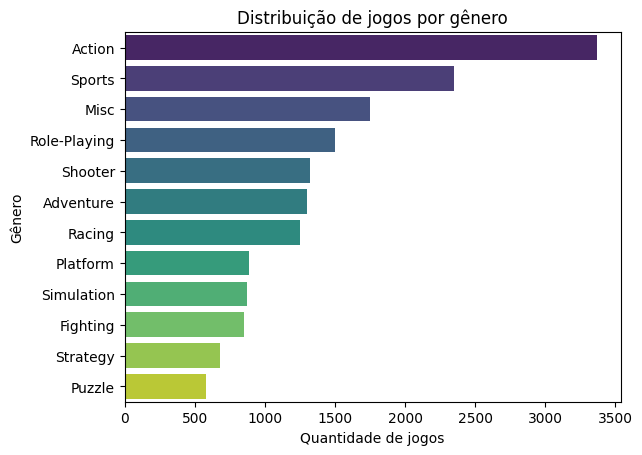

In [45]:
sns.barplot(
    data=genre_counts,
    x='count',
    y='genre',
    palette='viridis'
)
plt.title('Distribuição de jogos por gênero')
plt.xlabel('Quantidade de jogos')
plt.ylabel('Gênero')
plt.show()

In [46]:
# Somar vendas globais por gênero
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

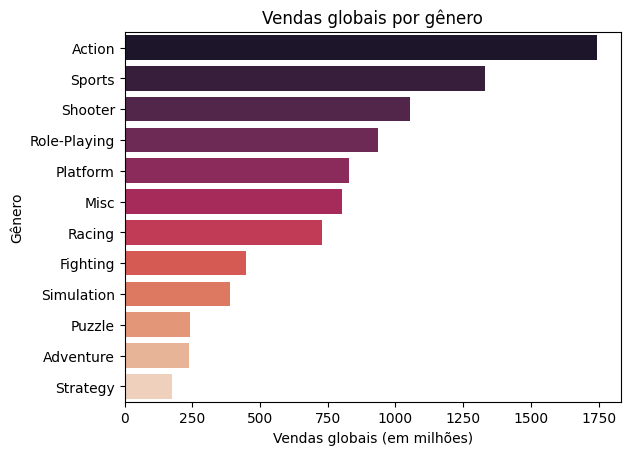

In [47]:
sns.barplot(
    data=genre_sales,
    x='total_sales',
    y='genre',
    palette='rocket'
)
plt.title('Vendas globais por gênero')
plt.xlabel('Vendas globais (em milhões)')
plt.ylabel('Gênero')
plt.show()

A análise da distribuição de jogos por gênero mostra que os estilos mais populares em termos de quantidade de jogos são os gêneros Action, Sports, Misc, Role-Playing e Shooter, com destaque para o gênero Action, que possui mais de 3.000 jogos lançados. Por outro lado, gêneros como Puzzle, Strategy e Unknown aparecem com um número bem menor de jogos.

Ao observarmos as vendas globais por gênero, percebemos que os gêneros mais lucrativos também incluem Action, Sports, Shooter e Role-Playing. O gênero Action novamente se destaca, com quase 1.800 milhões de unidades vendidas. Já gêneros como Strategy, Adventure, Puzzle e Simulation apresentam as vendas mais baixas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

GÊneros investigados adequadamente.
</div>



## Etapa 4 - Perfil de usuário para cada região

#### 4.1 - As 5 plataformas principais para cada região

##### 4.1.1 - Top 5 plataformas

In [48]:
# Extraindo as top 5 plataformas para cada região
na_platforms = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
eu_platforms = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
jp_platforms = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()

In [49]:
print('Top 5 plataformas NA (América do Norte):')
na_platforms

Top 5 plataformas NA (América do Norte):


,platform,na_sales
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.40


In [50]:
print('Top 5 plataformas EU (Europa):')
eu_platforms

Top 5 plataformas EU (Europa):


,platform,eu_sales
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


In [51]:
print('Top 5 plataformas JP (Japão):')
jp_platforms

Top 5 plataformas JP (Japão):


,platform,jp_sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67


##### 4.1.2 - Comparando as quotas de mercado

In [52]:
# Agrupar as vendas por plataforma para cada região
regional_sales = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

In [53]:
# Calcular as vendas totais por região
total_sales = regional_sales.sum()

In [54]:
# Calcular o percentual de participação de cada plataforma por região
market_share = regional_sales.divide(total_sales) * 100

In [55]:
# Ordenar pelo total da América do Norte, por exemplo
market_share_sorted = market_share.sort_values(by='na_sales', ascending=False)

# Mostrar as 5 principais plataformas
market_share_sorted.head(5)

,na_sales,eu_sales,jp_sales
platform,,,
X360,13.690726,11.169322,0.958114
PS2,13.267372,13.996304,10.729647
Wii,11.291719,10.816620,5.344012
PS3,8.941796,13.625038,6.181109
DS,8.689783,7.792042,13.533075


Podemos observar que suas quotas de mercado variam bastante de uma região para outra.

X360 se destaca especialmente na América do Norte, onde obteve 13,69 milhões em vendas, sendo a líder entre as cinco plataformas. No entanto, seu desempenho é significativamente mais fraco no Japão, com apenas 0,96 milhão de vendas.

PS2 se manteve com boas vendas entre os 3 mercados, sendo a única plataforma com mais de 10 milhões de vendas em todas as regiões. Vendeu mais especialmente na Europa, onde obteve 13,99 milhões de vendas.

Wii teve um bom desempenho na América do Norte (11,28 milhões) e Europa (10.81 milhões), mas um desempenho moderado no Japão, com apenas 5.34 milhões de vendas.

PS3 vendeu mais na Europa, com 13.62 milhões de vendas, do que em qualquer outra região, sendo essa a de maior sucesso para a plataforma.

DS teve um desempenho significativo no Japão, com 13.53  milhões de vendas. Já no ocidente, teve uma aceitação menor, com 8.68 milhões de vendas na América do Norte e 7.79 milhões de Vendas na Europa.

#### 4.2 - Os 5 principais gêneros para cada região

In [56]:
# Extraindo os top 5 gêneros para cada região
na_genres = games_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
eu_genres = games_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
jp_genres = games_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()

In [57]:
print('Top 5 gêneros NA (América do Norte):')
na_genres

Top 5 gêneros NA (América do Norte):


,genre,na_sales
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27


In [58]:
print('Top 5 gêneros EU (Europa):')
eu_genres

Top 5 gêneros EU (Europa):


,genre,eu_sales
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74


In [59]:
print('Top 5 gêneros JP (Japão):')
jp_genres

Top 5 gêneros JP (Japão):


,genre,jp_sales
0,Role-Playing,355.41
1,Action,161.43
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11


Os gêneros Action, Sports e Shooter lideram no ocidente. Já no Japão, o 1º lugar fica com Role-Playing, seguido de Action e Sports. 

#### 4.3 - Classificações ESRB e vendas por região

In [60]:
ratings = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
ratings

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40
Unknown,1240.68,613.30,841.93


As classificações do ESRB afetam sim as vendas, mas de maneiras diferentes em cada região:

Na América do Norte e na Europa, as classificações E, T e M representam a maior parte das vendas, refletindo a diversidade de público.

No Japão, a predominância da categoria Unknown sugere que o sistema ESRB é menos representativo, o que limita nossa análise direta.

Além disso, jogos com classificação AO (Adults Only) e EC (Early Childhood) vendem quase nada em qualquer região — o que mostra baixo apelo comercial.


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação. Muito bom! Talvez alguns gráficos deixariam o resultado ainda melhor!
</div>

## Etapa 5 - Teste de hipóteses

#### 5.1 - Hipótese 1

Hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Hipótese alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [61]:
xone_scores = games_df[(games_df['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = games_df[(games_df['platform'] == 'PC')]['user_score'].dropna()

In [62]:
t_stat1, p_value1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("Hipótese 1 - p-value:", p_value1)

Hipótese 1 - p-value: 4.935072360183574e-06


Existe uma diferença estatisticamente significativa entre as avaliações médias dos usuários de jogos para Xbox One e PC. Ou seja, os usuários dessas plataformas tendem a avaliar os jogos de forma diferente.

#### 5.2 - Hipótese 2

Hipótese nula: As médias de avaliações dos usuários para os gêneros Action e Sports são iguais.

Hipótese alternativa: As médias de avaliações dos usuários para os gêneros Action e Sports são diferentes.

In [63]:
action_scores = games_df[(games_df['genre'] == 'Action')]['user_score'].dropna()
sports_scores = games_df[(games_df['genre'] == 'Sports')]['user_score'].dropna()

In [64]:
t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print("Hipótese 2 - p-value:", p_value2)

Hipótese 2 - p-value: 0.11483818791498286


Não há evidência estatística suficiente para afirmar que as médias de avaliação dos gêneros Action e Sports são diferentes. Elas podem ser consideradas semelhantes em termos de avaliação média pelos usuários.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>


## Etapa 6 - Conclusão Geral

Este foi um bom projeto. Através de análise exploratória, tratamento de dados, visualizações e testes estatísticos, fui capaz reunir informações valiosas para orientar decisões estratégicas. Com os dados mais recentes, fomos capazes de:

Identificar plataformas promissoras para 2017.

Entender quais gêneros e classificações têm maior apelo por região.

Avaliar a relevância das notas de usuários e críticos sobre o sucesso comercial.

Produzir insights regionais para campanhas de marketing segmentadas.

Essas conclusões ajudarão a loja Ice a planejar melhor seus lançamentos e campanhas publicitárias, focando nos produtos com maior potencial de sucesso em 2017.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusões apresentadas!
</div>
